In [129]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [130]:
train_data = ImageDataGenerator(rescale=1)
test_data = ImageDataGenerator(rescale=1)

In [131]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))#, padding='same'
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [132]:
trainer = train_data.flow_from_directory('/train', batch_size=64, target_size=(150,150))
tester = test_data.flow_from_directory('/test', batch_size=64, target_size=(150,150))

Found 458 images belonging to 3 classes.
Found 198 images belonging to 3 classes.


In [133]:
labels = trainer.class_indices
print(labels)

{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2}


In [134]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(trainer, validation_data=tester, epochs=8)

Epoch 1/8
8/8 [==============================] - 27s 3s/step - loss: 513.0106 - accuracy: 0.3559 - val_loss: 13.7987 - val_accuracy: 0.6061
Epoch 2/8
8/8 [==============================] - 28s 3s/step - loss: 7.8223 - accuracy: 0.5852 - val_loss: 0.3524 - val_accuracy: 0.8636
Epoch 3/8
8/8 [==============================] - 26s 3s/step - loss: 0.5617 - accuracy: 0.8231 - val_loss: 0.2357 - val_accuracy: 0.8990
Epoch 4/8
8/8 [==============================] - 26s 3s/step - loss: 0.2170 - accuracy: 0.9258 - val_loss: 0.2849 - val_accuracy: 0.8939
Epoch 5/8
8/8 [==============================] - 26s 3s/step - loss: 0.1300 - accuracy: 0.9607 - val_loss: 0.2915 - val_accuracy: 0.8788
Epoch 6/8
8/8 [==============================] - 26s 3s/step - loss: 0.1107 - accuracy: 0.9629 - val_loss: 0.1863 - val_accuracy: 0.9545
Epoch 7/8
8/8 [==============================] - 26s 3s/step - loss: 0.0608 - accuracy: 0.9782 - val_loss: 0.1892 - val_accuracy: 0.9697
Epoch 8/8
8/8 [=======================

In [135]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 17, 17, 128)    

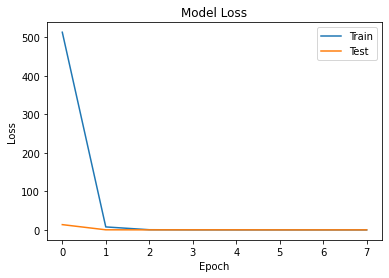

In [136]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'],loc='upper right')
plt.show()

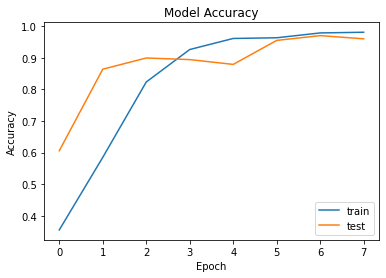

In [137]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')

In [139]:
model.save('/aob.h5')